Solve the following set of problems using Python.
1. Load "digits" datasets from SKlearn. Classify digit classes using KNN. Use the same data
splitting and performance metrics that you have used in previous week (week 4). Report your
findings including comparison of results with week 4.
2. Create digits classification model using DT algorithm using 50-50% and 70-30% data splitting
methods. Compare performances of these two models and explain the impact of difference in
data splitting on the performances of the model.
3. Create two more KNN-based classification models using the dataset used in Q1 by varying
distance metrics such as using cityblock and cosine. Report the performances of the
developed models including Q1 and explain the similarity or differences if any.
4. Creating random forest model using HR-Employee-Attrition.csv dataset and improve the
result using hyperparameter tuning. Hints. Visualise your performance fluctuation for
different hyperparameter values.
5. Creating GradientBoost model using HR-Employee-Attrition.csv dataset and improve the
result using hyperparameter tuning. Hints.
6. Compare the best model after hyperparameter tuning found in Q4 and Q5, and explain which
model is good and why

## <u>Solution</u>

<b>1. Load "digits" datasets from SKlearn. Classify digit classes using KNN. Use the same data splitting and performance metrics that you have used in previous week (week 4). Report your findings including comparison of results with week 4.</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

In [2]:
X,y= datasets.load_digits(return_X_y=True,as_frame=True) #Loading the digits dataset
X#Printing the data values

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [3]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [4]:
X.shape

(1797, 64)

In [5]:
y.value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

It has a dimension of 1797 rows and 64 columns excluding the target column. All the features are pixel score for determining the class of which digit it is. From target value distribution we can observe that it is classification of digits from 0 to 9.  Lets classify it using KNN.

Lets split the data into train and test before doing any other preprocessing

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [7]:
#We can observe that each data is of different scale we need to bring it to a format since the classification is depended on weightage
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#Since our dataset contains 64 columns it is better to reduce the dimension for proper functioning of our model.

from sklearn.decomposition import PCA
pca = PCA(n_components=3)  # We are choosing number of components as 3 since we choose that in our previous activity
pca_X_train = pca.fit_transform(X_train_scaled)
pca_X_test = pca.transform(X_test_scaled)

Now our dataset is scaled and dimensions are reduced, lets classify using KNN

In [9]:
pca_X_train.shape  #Dimension reduced to 3

(1437, 3)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() #Default parameters
knn.fit(pca_X_train,y_train)
y_predict = knn.predict(pca_X_test)

In [11]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
#Performance metrics used in previous tasks
accuracy = accuracy_score(y_test,y_predict)
precision = precision_score(y_test,y_predict,average='weighted')
recall = recall_score(y_test,y_predict,average='weighted')
f1 = f1_score(y_test,y_predict,average='weighted')

In [12]:
knn_li = {'Model':"KNN","Accuracy":[accuracy],"Precision":[precision],"Recall":[recall],"f1 score":[f1]}
knn_df = pd.DataFrame(knn_li)

In [13]:
knn_df

,Model,Accuracy,Precision,Recall,f1 score
0,KNN,0.75,0.740165,0.75,0.740588


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.70      0.86      0.77        37
           2       0.81      0.81      0.81        32
           3       0.66      0.71      0.68        38
           4       1.00      0.88      0.94        26
           5       0.50      0.35      0.41        49
           6       0.97      1.00      0.99        37
           7       0.73      0.88      0.80        40
           8       0.52      0.42      0.47        33
           9       0.70      0.76      0.73        34

    accuracy                           0.75       360
   macro avg       0.76      0.77      0.76       360
weighted avg       0.74      0.75      0.74       360



In [15]:
li2 = {'Model':"SVM ","Accuracy":0.741667,"Precision":0.768795,"Recall":0.741667,"f1 score":0.725013}
knn_df=knn_df.append(li2,ignore_index=True)

In [16]:
knn_df

,Model,Accuracy,Precision,Recall,f1 score
0,KNN,0.750000,0.740165,0.750000,0.740588
1,SVM,0.741667,0.768795,0.741667,0.725013


When comparing with the KNN model and SVM model we used previously we get a clear understanding of which one perform better.
KNN has higher accuracy of 0.750000 with SVM accuracy of 0.741667,KNN has higher accuracy of prediction.<br>
But when it comes to Precision SVM has advantage with 0.768795.This means it predicted correctly more often.<br>
KNN model acheieved higher Recall and f1score when compared with SVM model which means the positive was predicted more correctly.<br>
From all the metrics except Precision we can conclude that KNN outperformed SVM.

<b>2. Create digits classification model using DT algorithm using 50-50% and 70-30% data splitting methods. Compare performances of these two models and explain the impact of difference in data splitting on the performances of the model.</b>

We need to change the splitting criteria differently.

In [17]:
#On 50-50% data splitting
from sklearn.tree import DecisionTreeClassifier

X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.5,random_state=8)

In [18]:
model2 = DecisionTreeClassifier()
model2.fit(X_train2,y_train2)
y_predict2 = model2.predict(X_test2)

In [19]:
accuracy2 = accuracy_score(y_test2,y_predict2)
precision2 = precision_score(y_test2,y_predict2,average='weighted')
recall2 = recall_score(y_test2,y_predict2,average='weighted')
f12 = f1_score(y_test2,y_predict2,average='weighted')

In [20]:
model2_li = {'Model':"DT 50%-50%","Accuracy":[accuracy2],"Precision":[precision2],"Recall":[recall2],"f1 score":[f12]}
model2_df = pd.DataFrame(model2_li)

In [21]:
model2_df

,Model,Accuracy,Precision,Recall,f1 score
0,DT 50%-50%,0.85762,0.860063,0.85762,0.856936


In [22]:
print(classification_report(y_test2,y_predict2))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        89
           1       0.84      0.82      0.83        91
           2       0.78      0.90      0.84        88
           3       0.81      0.83      0.82        95
           4       0.92      0.85      0.88        91
           5       0.98      0.83      0.90        96
           6       0.88      0.94      0.91        81
           7       0.83      0.90      0.86        91
           8       0.80      0.69      0.74        93
           9       0.83      0.85      0.84        84

    accuracy                           0.86       899
   macro avg       0.86      0.86      0.86       899
weighted avg       0.86      0.86      0.86       899



In [23]:
#70-30% data split
X_train3,X_test3,y_train3,y_test3 = train_test_split(X,y,test_size=0.3,random_state=8)

In [24]:
model3 = DecisionTreeClassifier()
model3.fit(X_train3,y_train3)
y_predict3 = model3.predict(X_test3)

In [25]:
accuracy3 = accuracy_score(y_test3,y_predict3)
precision3 = precision_score(y_test3,y_predict3,average='weighted')
recall3 = recall_score(y_test3,y_predict3,average='weighted')
f13 = f1_score(y_test3,y_predict3,average='weighted')

In [26]:
model3_li = {'Model':"DT 70%-30%","Accuracy":accuracy3,"Precision":precision3,"Recall":recall3,"f1 score":f13}
model2_df = model2_df.append(model3_li,ignore_index=True)
model2_df

,Model,Accuracy,Precision,Recall,f1 score
0,DT 50%-50%,0.857620,0.860063,0.857620,0.856936
1,DT 70%-30%,0.844444,0.847315,0.844444,0.844760


In [27]:
print(classification_report(y_test3,y_predict3))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.76      0.85      0.80        59
           2       0.85      0.89      0.87        53
           3       0.86      0.79      0.82        62
           4       0.81      0.83      0.82        42
           5       0.85      0.90      0.88        62
           6       0.98      0.84      0.91        51
           7       0.87      0.87      0.87        54
           8       0.73      0.75      0.74        51
           9       0.79      0.74      0.76        50

    accuracy                           0.84       540
   macro avg       0.85      0.84      0.84       540
weighted avg       0.85      0.84      0.84       540



We have modeled using two kind of data split 50-50% and 70-30%. And we can observe that both the models are performing good with almost same performance scores, but 70-30% split has a slightly better result than 50-50% model. Accuracy,Precision,recall,f1score of 70-30 model is slightly more than the other model. This is possible because 70-30 model have more training data and it helps to learn complex pattern. We can observe this in the classification report itself, the first model have predicted 899 classes of data whereas second model predicted only 540 classes, this is because of low training data in second model.
<br>So what we should consider is the splitting of data, the size of training and testing data plays an important role in model building. The data splitting criteria should be based on size of the data, or we should seek help from other methods for selecting best parameters for this.

<b>3. Create two more KNN-based classification models using the dataset used in Q1 by varying distance metrics such as using cityblock and cosine. Report the performances of the developed models including Q1 and explain the similarity or differences if any.</b>

In [28]:
#The dataset used in Q1 is one which has been scaled and dimension reduced, so we will use the end product.
print(pca_X_train)
print(pca_X_test)

[[-0.10525843 -2.94360447  3.33543482]
 [-1.55961321 -0.64169616  3.30609633]
 [ 8.2019344  -1.86793853 -0.06989468]
 ...
 [-0.27132451  3.8708582  -0.06584724]
 [-0.94022115 -0.44327611  2.12574731]
 [ 2.20384013 -4.1385512  -0.55176005]]
[[ 1.29213462 -2.52116231 -1.8552083 ]
 [-1.85422829 -0.20954149 -1.09249642]
 [ 0.19840324  0.07020582 -3.87431219]
 ...
 [-2.3750436  -1.68175357  1.49727026]
 [ 1.41727168  1.99138088 -0.42375962]
 [ 2.04735123  4.74006608 -0.10468178]]


In [29]:
model_city = KNeighborsClassifier(n_neighbors=5,metric='cityblock')
model_cosine = KNeighborsClassifier(n_neighbors=5,metric='cosine')

In [30]:
model_city.fit(pca_X_train,y_train)
model_cosine.fit(pca_X_train,y_train)

KNeighborsClassifier(metric='cosine')

In [31]:
y_city_predict = model_city.predict(pca_X_test)
y_cosine_predict = model_cosine.predict(pca_X_test)

In [32]:
accuracy_city = accuracy_score(y_test,y_city_predict)
accuracy_cosine = accuracy_score(y_test,y_cosine_predict)

precision_city = precision_score(y_test,y_city_predict,average='weighted')
precision_cosine = precision_score(y_test,y_cosine_predict,average='weighted')

recall_city = recall_score(y_test,y_city_predict,average='weighted')
recall_cosine = recall_score(y_test,y_cosine_predict,average='weighted')

f1_city = f1_score(y_test,y_city_predict,average='weighted')
f1_cosine = f1_score(y_test,y_cosine_predict,average='weighted')

In [33]:
data_li = {'Model':["KNN default","KNN with cityblock","KNN with cosine"],"Accuracy":[knn_df.iloc[0,1],accuracy_city,accuracy_cosine],"Precision":[knn_df.iloc[0,2],precision_city,precision_cosine],"Recall":[knn_df.iloc[0,3],recall_city,recall_cosine],"f1 score":[knn_df.iloc[0,4],f1_city,f1_cosine]}
knn_score = pd.DataFrame(data_li)

In [34]:
knn_score

,Model,Accuracy,Precision,Recall,f1 score
0,KNN default,0.750000,0.740165,0.750000,0.740588
1,KNN with cityblock,0.747222,0.738359,0.747222,0.735949
2,KNN with cosine,0.686111,0.647980,0.686111,0.660268


Here we are comparing performance metrics of three KNearestNeighbor Classifier with different distance metrics which are:
KNN with default distance metrics which is Minwoski with p =2 which is Euclidean distance, then KNN with cityblock and cosine distance metrics. Cityblock is also called as Manhattan Distance<b> (Different Types of Distance Metrics used in Machine Learning (2019) :Manhattan Distance )</b><br><br>
The distance metrics are used to find the distance/similarity between the data points for each algorithms.<br><br>
From our findings it's observable that the KNN with Euclidean distance is performing better in all 4 score values.
Next best performing model is the one with cityblock distance measure and following is the model with cosine distance measure.<br><br>
Euclidean Distance is mostly used with data that have continues features having numeric values. Used to measure distance between two rows<b>(How to Decide the Perfect Distance Metric For Your Machine Learning Model (nd):Euclidean distance)</b>.<br><br>
Cityblock/Manhattan Distance is used for calculating distance between grid like path. It is useful where dataset is having discrete or categorical variables<b>(How to Decide the Perfect Distance Metric For Your Machine Learning Model (nd):Manhattan distance)</b>.<br><br>
Cosine distance measure is used to find amount of similarity between each data points.<br><br>
Each measure has it's own usage and it works well according to the data and the output one is expecting.
The reason KNN default is performing best is because the data is continuous and it is scaled. Whereas cityblock works best with categorical data and cosine distance works best over high dimensional data which are absent here hence the low performance.

<b>4. Creating random forest model using HR-Employee-Attrition.csv dataset and improve the result using hyperparameter tuning. Hints. Visualise your performance fluctuation for different hyperparameter values.</b>

In [35]:
%reset -f

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [37]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [38]:
df.shape

(1470, 35)

Got 1470 rows and 35 columns of data.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [40]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

From above two cells we can say there are no null values and the data contain both numerical and categorical data. And we are here to build a model for attrition prediction so our target variable must be Attrition and it is a categorical variable.

In [41]:
df.describe().T  #5 point summary

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


We got 26 numerical and 9 categorical variables. From the summary we see that the column EmployeeCount is having only one value, need to confirm it. Same applies for StandardHours column. Most features are some scores given by employees which differ on their utility. The most experience an employee have is 40 years.

In [42]:
df.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [43]:
df.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

Yes it is true both these variables are having only one value itself, need to check if it give any value to our problem.

In [44]:
#Lets check our supposed target variable distribution
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

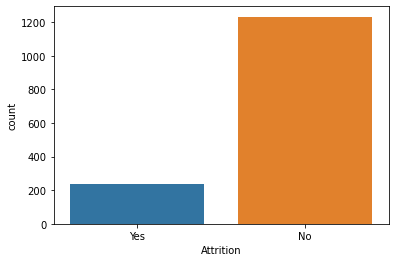

In [45]:
sns.countplot(x='Attrition',data=df)

We can clearly see there is an imbalance in the target data, lets see how our model performs. 

In [46]:
df.select_dtypes(include='object').columns[1:].tolist()


['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

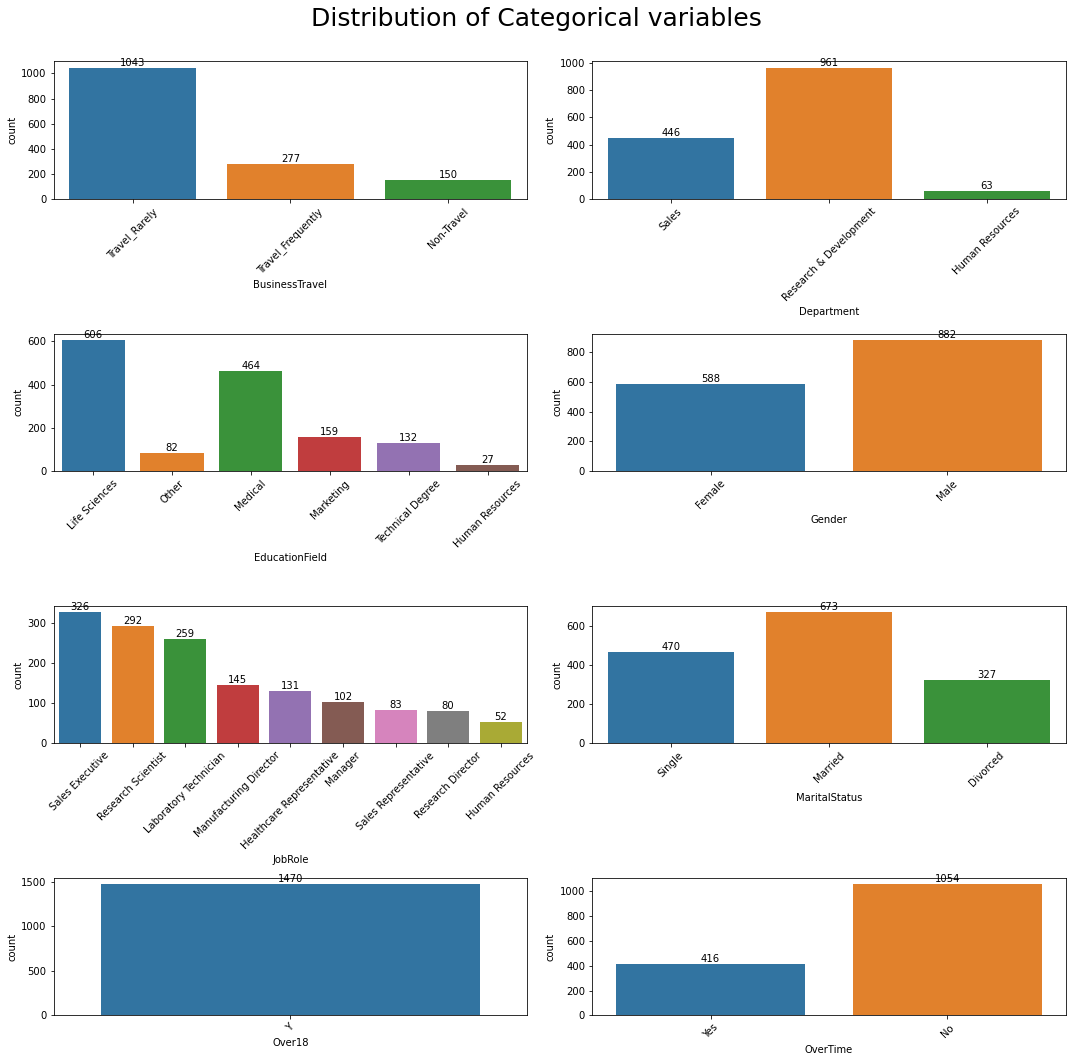

In [47]:
#Lets check for the distribution of categorical data
cat_li = df.select_dtypes(include='object').columns[1:].tolist() #Storing categorical variable except target
fig,axes = plt.subplots(4,2,figsize=(15, 15))

for i, j in enumerate(cat_li):
    row = i // 2
    col = i%2
    sns.countplot(x=j,data=df,ax=axes[row,col])
    for x in axes[row,col].patches:
        height = x.get_height()
        axes[row, col].annotate(f'{height}', (x.get_x() + x.get_width() / 2., height),ha='center',va='bottom')
    axes[row,col].tick_params(axis='x',rotation=45)
fig.suptitle("Distribution of Categorical variables\n",fontsize =25)
plt.tight_layout()
plt.show()

From above plot we can see that the categorical variables classes varies from 1 to 9. Column Over18 has only one category. We need to convert all these.

In [48]:
#We are using one hot encoding for the convertion of categorical variable
#Before that we are splitting data to target and features
X = df.drop(columns='Attrition')
y=df.Attrition

In [49]:
X.shape

(1470, 34)

In [50]:
X=pd.get_dummies(X,drop_first=True)

In [51]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0


Since we have converted to numerical the categorical variable "Over18" is skipped because of 1 value (Automatically performed). Usually we scale the data but here we are using RandomForest model so the scaling is no use for our model since it doesn't consider distance between datapoints rather they use splitting<b>(How data normalization affects your Random Forest algorithm (2021):Importance of data normalization in Random Forest classifiers and regressors)</b>

In [52]:
#Lets split the data into test and train

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [53]:
#Classify using RandomForest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=8)
rfc.fit(X_train,y_train)
y_predict = rfc.predict(X_test)

In [58]:
#Now we need to measure the performance of the model
from sklearn.metrics import classification_report,accuracy_score,precision_score, recall_score,f1_score

accuracy_RF = accuracy_score(y_test,y_predict)
print("The accuracy score of test data of RandomForest model with default parameters: ",accuracy_RF)

precision_RF = precision_score(y_test,y_predict,pos_label='Yes')
print("The precision score of test data of RandomForest model with default parameters: ",precision_RF)

recall_RF = recall_score(y_test,y_predict,pos_label='Yes')
print("The recall score of test data of RandomForest model with default parameters: ",recall_RF)

f1_RF = f1_score(y_test,y_predict,pos_label='Yes')
print("The f1 score of test data of RandomForest model with default parameters: ",f1_RF)

The accuracy score of test data of RandomForest model with default parameters:  0.8605442176870748
The precision score of test data of RandomForest model with default parameters:  0.5833333333333334
The recall score of test data of RandomForest model with default parameters:  0.16279069767441862
The f1 score of test data of RandomForest model with default parameters:  0.2545454545454546


In [59]:
#Lets print the classification report for other scores
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          No       0.87      0.98      0.92       251
         Yes       0.58      0.16      0.25        43

    accuracy                           0.86       294
   macro avg       0.73      0.57      0.59       294
weighted avg       0.83      0.86      0.83       294



We can see the RandomForest is having an accuracy of 86% which is good. And from classification report we can see the class 'No' is having higher precision,recall,f1score this is due to the imbalance of target variable. 
<br>But we can't depend on accuracy to measure the performance of this data because there is high imbalance in the target variable. We need to address the stability of our model.

In [60]:
#Lets check for the score of training data also
acc_train = rfc.predict(X_train)
print("The accuracy of train data of RandomForest model with default parameters:",accuracy_score(y_train,acc_train))

The accuracy of train data of RandomForest model with default parameters: 1.0


There is a small overfitting

Lets try to improve our result using hyperparameter tuning by GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV
#GridSearchCV finds the best hyperparameter for this model. It performs various values for each parameter we give.
para = { 
    'n_estimators':[50,100,150,200],
    'max_depth':[None,5,10,15,20],
    'min_samples_split':[2,5,10,15],
    'min_samples_leaf':[1,2,4,6,8],
}

gS = GridSearchCV(estimator=rfc,param_grid=para,cv=5,n_jobs=-1)
gS.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=8), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 150, 200]})

In [62]:
best_hyper = gS.best_params_
print("The best parameters found using GridSearchCV for RandomForest classifier is: ",best_hyper)

The best parameters found using GridSearchCV for RandomForest classifier is:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [63]:
#Lets evaluate the best parameter with RandomForest to check its accuracy
opt_rfc =RandomForestClassifier(random_state=8,**best_hyper)
opt_rfc.fit(X_train,y_train)
y_opt_pred = opt_rfc.predict(X_test)

In [64]:
opt_rf_accuracy = accuracy_score(y_test,y_opt_pred)
print("The accuracy score after GridSearchCV of RandomForest classifier is : ",opt_rf_accuracy)

precision_opt = precision_score(y_test,y_opt_pred,pos_label='Yes')
print("The precision score of test data after GridSearchCV of RandomForest classifier is: ",precision_opt)

recall_opt = recall_score(y_test,y_opt_pred,pos_label='Yes')
print("The recall score of test data after GridSearchCV of RandomForest classifier is: ",recall_opt)

f1_opt = f1_score(y_test,y_opt_pred,pos_label='Yes')
print("The f1 score of test data after GridSearchCV of RandomForest classifier is: ",f1_opt)


The accuracy score after GridSearchCV of RandomForest classifier is :  0.8605442176870748
The precision score of test data after GridSearchCV of RandomForest classifier is:  0.6
The recall score of test data after GridSearchCV of RandomForest classifier is:  0.13953488372093023
The f1 score of test data after GridSearchCV of RandomForest classifier is:  0.22641509433962265


In [65]:
print(classification_report(y_test,y_opt_pred))

              precision    recall  f1-score   support

          No       0.87      0.98      0.92       251
         Yes       0.60      0.14      0.23        43

    accuracy                           0.86       294
   macro avg       0.73      0.56      0.57       294
weighted avg       0.83      0.86      0.82       294



We got the same accuracy value that we got before Hyperparmeter tuning. We can say the default parameters of RandomForest gave the best accuracy for the dataset.<br>

The scores for the minority class gave different values than the model with default parameters.
That is why we can't depend on accuracy to measure the performance of this data because there is high imbalance in the target variable. We need to address the stability of our model.

Since we got the best parameters for our model lets visualize the change in mean test score with variying/fluctuating hyperparameters.

GridSearch has built in function to output the details of each parameters that was tested and the score of each change.
We are using cv_results_ function for this.

In [66]:
results = pd.DataFrame(gS.cv_results_)  #Storing the results into a dataframe for better manipulations
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.247094,0.009327,0.015781,0.003357,None,1,2,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.817797,0.842553,0.863830,0.855319,0.876596,0.851219,0.020060,79
1,0.461867,0.050845,0.028292,0.006344,None,1,2,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.830508,0.842553,0.859574,0.868085,0.872340,0.854612,0.015791,13
2,0.621826,0.015029,0.045451,0.008278,None,1,2,150,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.826271,0.842553,0.855319,0.868085,0.872340,0.852914,0.016915,41
3,0.851707,0.021854,0.050066,0.007579,None,1,2,200,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.826271,0.842553,0.863830,0.863830,0.872340,0.853765,0.016907,24
4,0.234908,0.023926,0.016813,0.009064,None,1,5,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.817797,0.838298,0.876596,0.851064,0.868085,0.850368,0.021018,103


There are different methods to plot the fluctuation, here we are using boxplots for showing the difference, we can either loop the parameters used or print each boxplot with different parameter vs its accuracy variations. Since only 4 parameters were involved we are creating a userdefined funtion to print each boxplot as a subplot.

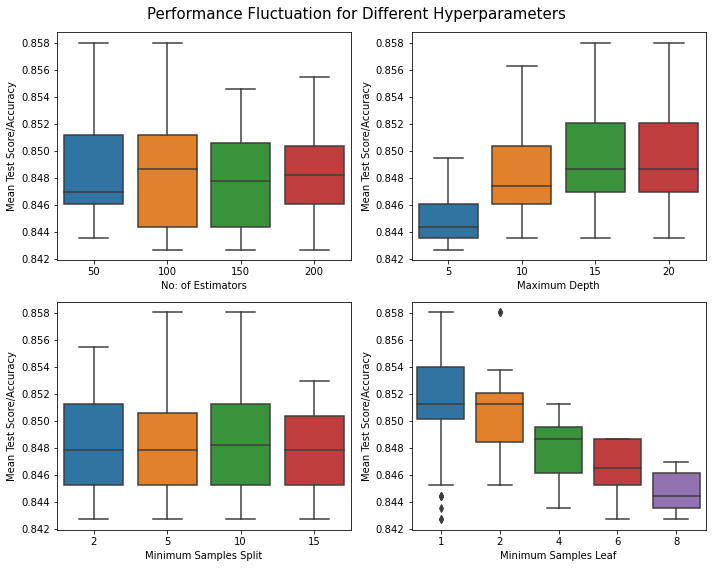

In [67]:
def performance_fluctuation():
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    sns.boxplot(x='param_n_estimators', y='mean_test_score', data=results, ax=axes[0, 0])
    axes[0, 0].set_xlabel('No: of Estimators')
    axes[0, 0].set_ylabel('Mean Test Score')

    sns.boxplot(x='param_max_depth', y='mean_test_score', data=results, ax=axes[0, 1])
    axes[0, 1].set_xlabel('Maximum Depth')
    axes[0, 1].set_ylabel('Mean Test Score')

    sns.boxplot(x='param_min_samples_split', y='mean_test_score', data=results, ax=axes[1, 0])
    axes[1, 0].set_xlabel('Minimum Samples Split')
    axes[1, 0].set_ylabel('Mean Test Score')

    sns.boxplot(x='param_min_samples_leaf', y='mean_test_score', data=results, ax=axes[1, 1])
    axes[1, 1].set_xlabel('Minimum Samples Leaf')
    axes[1, 1].set_ylabel('Mean Test Score')

    plt.suptitle('Performance Fluctuation for Different Hyperparameters', fontsize=15)
    plt.tight_layout()
    plt.show()

performance_fluctuation()

<b>5. Creating GradientBoost model using HR-Employee-Attrition.csv dataset and improve the result using hyperparameter tuning. Hints.</b>

GradientBoosting is another ensemble method which combines several weak learners into strong learners,in which each new model is trained to minimize the loss function.

In [68]:
#Lets create GradientBoosting model using previously used dataset
from sklearn.ensemble import GradientBoostingClassifier

gB = GradientBoostingClassifier(random_state=8)
gB.fit(X_train,y_train)
gB_predict = gB.predict(X_test)


In [69]:
accuracy_gB = accuracy_score(y_test,gB_predict) #Finding the score
print("The accuracy of test data of GradientBoost model with default parameters: ",accuracy_gB)

precision_gB = precision_score(y_test,gB_predict,pos_label='Yes')
print("The precision score of test data of GradientBoost model with default parameters: ",precision_gB)

recall_gB = recall_score(y_test,gB_predict,pos_label='Yes')
print("The recall score of test data of GradientBoost model with default parameters: ",recall_gB)

f1_gB = f1_score(y_test,gB_predict,pos_label='Yes')
print("The f1 score of test data of GradientBoost model with default parameters: ",f1_gB)


The accuracy of test data of GradientBoost model with default parameters:  0.8775510204081632
The precision score of test data of GradientBoost model with default parameters:  0.6666666666666666
The recall score of test data of GradientBoost model with default parameters:  0.32558139534883723
The f1 score of test data of GradientBoost model with default parameters:  0.4375


In [70]:
#Lets print the classification report for other scores
print(classification_report(y_test,gB_predict))

              precision    recall  f1-score   support

          No       0.89      0.97      0.93       251
         Yes       0.67      0.33      0.44        43

    accuracy                           0.88       294
   macro avg       0.78      0.65      0.68       294
weighted avg       0.86      0.88      0.86       294



Just like mentioned in RandomForest here also the second class is giving less accuracy and other scores, this is caused by imbalance in target variable. GradientBoosting is giving good accuracy score of 87% which is higher than RandomForest. There is also differnece in other scores also. <br>Here also accuracy cant be used to make proper measure.

In [71]:
#Lets check for the score of training data also
gB_train = gB.predict(X_train)
print("The accuracy of train data of GradientBoost model with default parameters:",accuracy_score(y_train,gB_train))

The accuracy of train data of GradientBoost model with default parameters: 0.9574829931972789


Unlike in the case of RandomForest here the training accuracy has reduced from 1, so the chance of overfitting reduced.

Lets try to improve the result by hyperparameter tuning with GridSearchCV

In [72]:
#Lets create the parameters for tuning
para_boost = {
    'learning_rate':[0.1,0.2,0.3,0.4], #We have added learning rate also because it's a major parameter for GradientBoosting.
    'n_estimators':[50,100,150,200],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_depth':[3,4,5,6]
}

gS_boost = GridSearchCV(estimator=gB,param_grid=para_boost,cv=5,n_jobs=-1)
gS_boost.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=8),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [73]:
best_gS = gS_boost.best_params_
print("The best parameters found using GridSearchCV for GradientBoost model is : ",best_gS)

The best parameters found using GridSearchCV for GradientBoost model is :  {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [74]:
#Lets evaluate the GradientBoosting with this best parameter and check the model performance
new_GB = GradientBoostingClassifier(**best_gS,random_state=8)
new_GB.fit(X_train,y_train)
new_pred = new_GB.predict(X_test)

In [75]:
opt_gb_accuracy = accuracy_score(y_test,new_pred)
print("The accuracy score after GridSearchCV of GradientBoosting classifier is : ",opt_gb_accuracy)

opt_precision_gB = precision_score(y_test,new_pred,pos_label='Yes')
print("The precision score after GridSearchCV of GradientBoosting classifier is : ",opt_precision_gB)

opt_recall_gB = recall_score(y_test,new_pred,pos_label='Yes')
print("The recall score after GridSearchCV of GradientBoosting classifier is : ",opt_recall_gB)

opt_f1_gB = f1_score(y_test,new_pred,pos_label='Yes')
print("The f1 score after GridSearchCV of GradientBoosting classifier is : ",opt_f1_gB)

The accuracy score after GridSearchCV of GradientBoosting classifier is :  0.8843537414965986
The precision score after GridSearchCV of GradientBoosting classifier is :  0.7647058823529411
The recall score after GridSearchCV of GradientBoosting classifier is :  0.3023255813953488
The f1 score after GridSearchCV of GradientBoosting classifier is :  0.4333333333333333


In [76]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

          No       0.89      0.98      0.94       251
         Yes       0.76      0.30      0.43        43

    accuracy                           0.88       294
   macro avg       0.83      0.64      0.68       294
weighted avg       0.87      0.88      0.86       294



The accuracy from hyperparmeter tuning is slightly higher than the default GradientBoosting accuracy.
<br>
Precision recall and f1 score is showing variations after GridSearchCV. The prediction for minority class got slighlty improved.<br>
Here also we need to address the model stability.

<b>6. Compare the best model after hyperparameter tuning found in Q4 and Q5, and explain which model is good and why.</b>

Here we are comparing the RandomForest classifier and GradientBoost classifier performance before and after hyperparameter tuning.

In [77]:
#Lets combine this into a dataframe.

final_li = {'Model':["RandomForest","Random Forest(GridSearchCV)","GradientBoosting","GradientBoosting (GridSearchCV)"],
            "Accuracy":[accuracy_RF,opt_rf_accuracy,accuracy_gB,opt_gb_accuracy],
            "Precision":[precision_RF,precision_opt,precision_gB,opt_precision_gB],
           'Recall':[recall_RF,recall_opt,recall_gB,opt_recall_gB],
            'F1 Score':[f1_RF,f1_opt,f1_gB,opt_f1_gB]}
final_df = pd.DataFrame(final_li)
final_df

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForest,0.860544,0.583333,0.162791,0.254545
1,Random Forest(GridSearchCV),0.860544,0.600000,0.139535,0.226415
2,GradientBoosting,0.877551,0.666667,0.325581,0.437500
3,GradientBoosting (GridSearchCV),0.884354,0.764706,0.302326,0.433333


From the above dataframe we can see the performance metrics of our four models, when checking the results we will look for the best accuracy and GradientBoosting with GridSearchCV will be chosen because of high accuracy than the rest.
But we should consider some other things before jumping into the conclusion.<br>
We were aware of the class imbalance in the data, the negative value is having high distribution than the positive value. It is known that if an imbalanced data is used for model building then the model tends to predict the majority class more often thus becoming a skewness/biass in the model prediction.<br>
This is called model stability. A stabel model when applied to different subsets of datasets with minor changes to the data should give consistent performance. The predictions should be consistenet.<br>

So we should never consider only accuracy to evaluate such an unstable model as we have. The accuracy will alwayas be high due to the majority class.<br>

From the above datafram we can see the GradientBoosting Classifier with GridSearchCV is having higher accuracy than the rest. But since the imbalance we need to check which model has best minority class prediction. The Precision and Recall metrics focuses on minority class, these measure the models ability and accuracy for the positive predictions. And F1 score is the harmonic mean of both Precision and Recall which is a best measure for imbalance data.<br>
GradientBoosting with default parameter is giving slightly higher F1 score and Precision but with the GridSearchCV we are getting slighlty higher Accuracy and Precision. So we can conclude that GradientBoosting with GridSearchCV is the best model for our dataset when compared with the rest.<br>


And we can notice that RandomForest classifier accuracy didn't change even after GridSearchCV, it was less affected by change in the parameters.<br>
Both RandomForest and GradientBoosting are ensemble models used for classification and regression.<br><br>
RandomForest comprises of multiple DecisionTrees and each tree is trained and the results are combined to give the final output. It can handle bigger data and perform faster.<b>(Random Forest vs Gradient Boosting Algorithm(2023): What is Random Forest?)</b>It is a parallel model.<br><br>
GradientBoosting builds decision trees one after other each one correcting the previous ones error, this is done by calculating loss function of tree. Likewise the fine filtered output is made by combining all the trees output. It has high predictive capacity.<b>(Random Forest vs Gradient Boosting Algorithm(2023): What is Gradient Boosting?)</b> It is a sequential model.<br><br>
RandomForest is less affected by the change in parameters,<b>(Hyperparameter tuning in random forests(nd):) How many combinations of hyperparameters should you try?)</b> this maybe the reason why the accuracy of RandomForest used in our model didn't change even after GridSearchCV. Whereas GradientBoost is sensitive towards parameters. The parallel method used in RandomForest maybe the cause for it. Sequential method and the calculation of loss function gives this ability to change accuracy accordingly. GradientBoosting also have special parameter 'learning_rate' which is not present in RandomForest.<br><br>


# <u>List of References</u>



CrunchingtheData (nd) Hyperparameter tuning in random forests, accessed 5 August 2023.<br>
https://crunchingthedata.com/hyperparameter-tuning-in-random-forests/#:~:text=random%20forest%20model%3F-,Random%20forest%20models%20are%20less%20sensitive%20to%20the%20choice%20of,in%20large%20increase%20in%20business<br><br>

Medium (10 November 2019) Different Types of Distance Metrics used in Machine Learning,accessed 4 August 2023.<br>
https://medium.com/@kunal_gohrani/different-types-of-distance-metrics-used-in-machine-learning-e9928c5e26c7<br><br>

TowardsdataScience (13 August 2021) How data normalization affects your Random Forest algorithm, accessed 4 August 2023.<br>
https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf#:~:text=Stack%20Overflow%3A%20(1)%20No,does%20not%20require%20feature%20scaling.<br><br>





Turing (nd) How to Decide the Perfect Distance Metric For Your Machine Learning Model, accessed 4 August 2023.<br>
https://www.turing.com/kb/how-to-decide-perfect-distance-metric-for-machine-learning-model

TutorialsPoint (24 July 2023) Random Forest vs Gradient Boosting Algorithm,accessed 5 August 2023.<br>
https://www.tutorialspoint.com/random-forest-vs-gradient-boosting-algorithm<br><br>